# The goal of this tutorial is to post process a rst file to plot displacements, stresses...

To use it, add PYTHONPATH to the generated python code from Protocols/packages and ANSYS_PATH to your ansys install path

1st step : load the necessary module of dpf for grpc and launch the server

In [1]:
from ansys import dpf
from ansys.dpf.server import start_local_server

In [2]:
start_local_server()

server started at --address 10.110.2.47 --port 50052


2nd step : create a model with the path of the result file

In [3]:
path = r'c:/temp/cp55.rst'
model = dpf.Model(path)

3rd step : get the time freq support

In [4]:
timefreqsupport = model.time_freq_support

In [5]:
timefield = timefreqsupport.time_frequencies
timefield.scoping.ids
timefield.get_entity_data(0)
timefield.elementary_data_count
timefreqsupport.complex_frequencies.size

35

In [6]:
print(timefreqsupport)

Time/Frequency Info:
	Number of sets: 35

With complex values
 
 Cumulative      Time (s)       Loadstep     Substep   
     1             0.0             1            1      
     2             0.02            1            2      
     3             0.04            1            3      
     4             0.06            1            4      
     5             0.08            1            5      
     6             0.1             1            6      
     7             0.12            1            7      
     8             0.14            1            8      
     9             0.16            1            9      
     10            0.18            1            10     
     11            0.2             1            11     
     12           0.219            1            12     
     13           0.239            1            13     
     14           0.259            1            14     
     15           0.279            1            15     
     16           0.299            1    

## Using displacement

4 th step : create the operator reader of displacement and set it's time scoping request as the entire time freq support
connect it to a norm and to a min max

In [7]:
displacements = model.displacement()
timeids = list(range(1,timefreqsupport.n_sets+1))

In [8]:
displacements.inputs.time_scoping(timeids)

In [9]:
normProvider = displacements.norm()

In [10]:
min_max_provider = normProvider.min_max()

In [11]:
min = min_max_provider.outputs.field_min()
max = min_max_provider.outputs.field_max()
max.data

[0.0,
 0.0006267372903018056,
 0.0025094009142665004,
 0.005641846246302676,
 0.009999923398266329,
 0.015521540117110409,
 0.022078712720450363,
 0.029444587009846576,
 0.03725894252314807,
 0.0449972152013357,
 0.05195353454479884,
 0.05703911801494583,
 0.05982844150784884,
 0.0589761684373874,
 0.05358419092854356,
 0.04310435808459619,
 0.027597819239314075,
 0.007984309803602908,
 0.01379509993808897,
 0.03478255103903859,
 0.05130461351335084,
 0.05942391889982178,
 0.05715204142158222,
 0.04272116079422172,
 0.01787116097063537,
 0.012449936699550468,
 0.04062977331496594,
 0.05913065884847142,
 0.060420564719179184,
 0.04188290338330022,
 0.012018786803938152,
 0.0352653150526427,
 0.05950851527080637,
 0.06077103487616713,
 0.037337691401448825]

5th step : plot the results over time

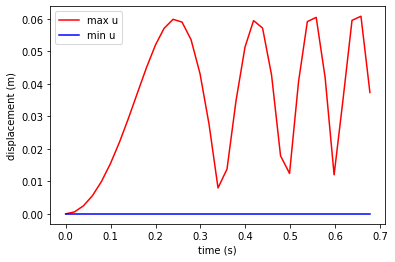

In [12]:
import matplotlib.pyplot as pyplot

pyplot.plot(timefield.data,max.data,'r',label='max u')
pyplot.plot(timefield.data,min.data,'b',label="min u")
#pyplot.title("maximum and minimum of displacement over time")
pyplot.xlabel("time (s)")
pyplot.ylabel("displacement (m)")
leg = pyplot.legend()

6th step : plot the maximum for each component

In [13]:
component_selector=displacements.X()
min_max_provider = component_selector.min_max()

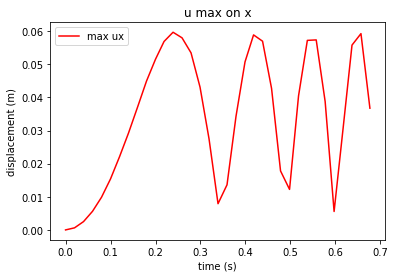

In [14]:
min = min_max_provider.outputs.field_min()
max = min_max_provider.outputs.field_max()
pyplot.plot(timefield.data,max.data,'r',label='max ux')
pyplot.title("u max on x")
pyplot.xlabel("time (s)")
pyplot.ylabel("displacement (m)")
leg =pyplot.legend()

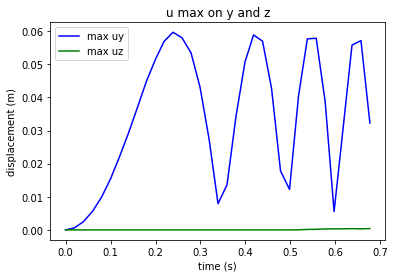

In [15]:
component_selector=displacements.Y()
min_max_provider = component_selector.min_max()
min = min_max_provider.outputs.field_min()
max = min_max_provider.outputs.field_max()
pyplot.plot(timefield.data,max.data,'b',label='max uy')
component_selector=displacements.Z()
min_max_provider = component_selector.min_max()
min = min_max_provider.outputs.field_min()
max = min_max_provider.outputs.field_max()
pyplot.plot(timefield.data,max.data,'g',label='max uz')
pyplot.xlabel("time (s)")
pyplot.ylabel("displacement (m)")
pyplot.title("u max on y and z")
leg =pyplot.legend()

## Using stress

7th step : create the operator reader of stresses eqv and set it's time scoping request as the entire time freq support
connect it to a min max

In [16]:
eqvProvider = model.stress().eqv()
eqvProvider.inputs.time_scoping(timeids)

In [17]:
min_max_provider.inputs.connect(eqvProvider.outputs)
min = min_max_provider.outputs.field_min()
max = min_max_provider.outputs.field_max()

8th step : plot the results over time

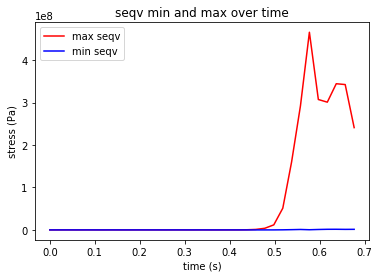

In [18]:
pyplot.plot(timefield.data,max.data,'r',label='max seqv')
pyplot.plot(timefield.data,min.data,'b',label="min seqv")
pyplot.xlabel("time (s)")
pyplot.ylabel("stress (Pa)")
pyplot.title("seqv min and max over time")
leg =pyplot.legend()

## Using mesh

9th step : create the operator reader of mesh and plot the repartition of seqv over the z coordinates for the last time step

Meshed Region
	3820 nodes
	785 elements
	Unit: m 



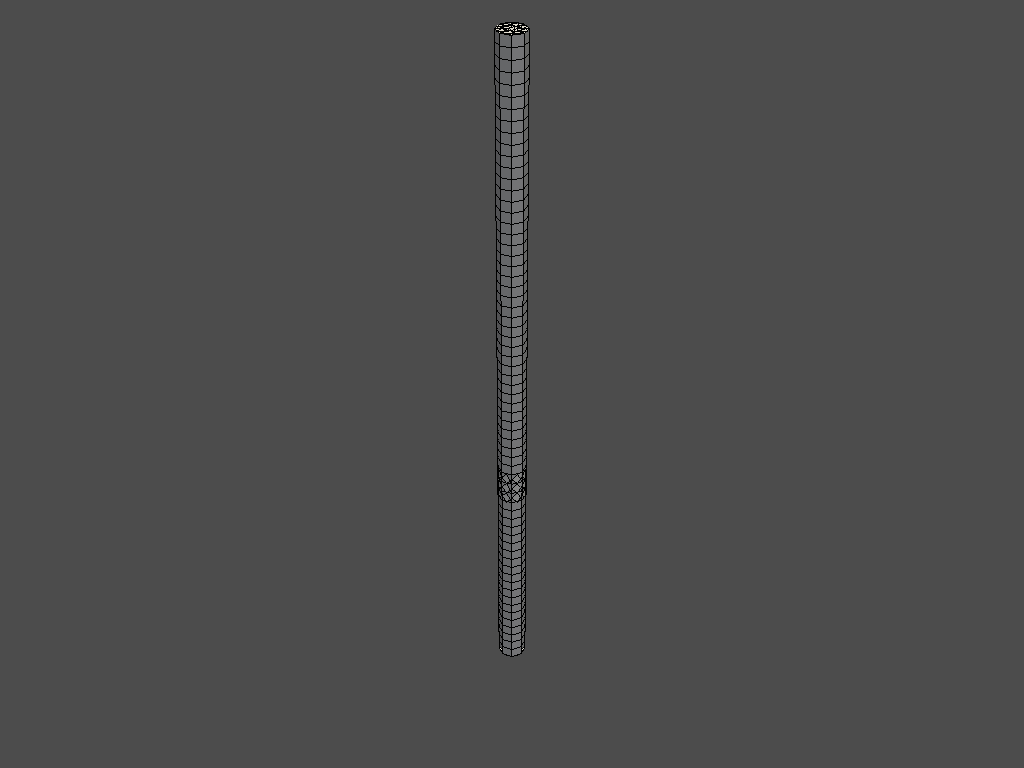

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [19]:
mesh = model.meshed_region
print(mesh)
model.plot()
fcseqv = eqvProvider.outputs.fields_container()
field_to_plot=fcseqv.get_fields(timeid =29)
nodescoping = field_to_plot.scoping 

In [20]:
field_to_plot.data

[37322684.41219654,
 13842088.28781669,
 16234894.48639312,
 55017098.72001592,
 20358127.660560034,
 7975230.364013541,
 17153593.766903415,
 42831456.51191694,
 14401289.527269458,
 32236323.124859028,
 9065586.598304959,
 29642535.12066506,
 41197343.162931755,
 62842091.00383859,
 23098359.782618098,
 52110598.67651434,
 34570601.71921462,
 59928759.10634736,
 19311414.528040566,
 47608768.690529175,
 21921914.931561943,
 12374509.540742677,
 5818176.7043507,
 6409604.388833356,
 29882618.387280285,
 16294959.957215082,
 35873221.27954497,
 34016217.26795755,
 52428398.47756407,
 39140351.50729712,
 13924560.557772605,
 18612416.246276293,
 37678475.27793556,
 14491291.194057366,
 20441152.18901503,
 59884372.59614164,
 12633453.910318315,
 29901721.011185765,
 40333964.89339423,
 65284472.66351646,
 33760207.241433695,
 61832978.934757076,
 20120521.255592708,
 6823477.197546969,
 30182521.236436866,
 33477858.52944565,
 56532334.55939809,
 17519849.766352974,
 40308507.67503511,


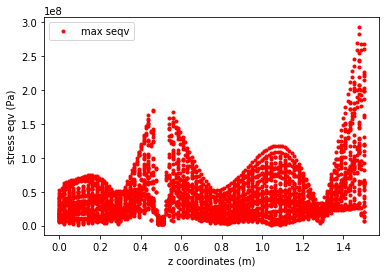

In [21]:
xlist=[]
maxeqvdata=[]
index=0
for id in nodescoping.ids :
    xlist.append(mesh.get_node(nodeid=id).get_coordinates()[2]) #get z coordinate of the node
    maxeqvdata.append(field_to_plot.get_entity_data(index)[0])
    index+=1
pyplot.plot(xlist,maxeqvdata,'r.',label='max seqv')
pyplot.xlabel("z coordinates (m)")
pyplot.ylabel("stress eqv (Pa)")
pyplot.legend()

## Using result info

10th step : read the result info to find which results are available

In [22]:
model.available_results

{'displacement': 'U',
 'force': 'RF',
 'element nodal _forces': 'ENF',
 'stress': 'S',
 'volume': 'ENG_VOL',
 'energy-stiffness matrix': 'ENG_SE',
 'hourglass _energy': 'ENG_AHO',
 'thermal dissipation energy': 'ENG_TH',
 'kinetic _energy': 'ENG_KE',
 'co-energy': 'ENG_CO',
 'incremental energy': 'ENG_INC',
 'strain': 'EPEL',
 'thermal _strains eqv': 'ETH_EQV',
 'swelling _strains': 'ETH_SWL',
 'temperature': 'BFE'}

## export on vtk

In [23]:
vtkexport = model.operator("vtk_export")

In [24]:
vtkexport.inputs.connect(r'c:/temp/vtk.vtk')
vtkexport.inputs.connect(model.meshed_region)
vtkexport.inputs.connect(eqvProvider.outputs)
vtkexport.eval()